<a href="https://colab.research.google.com/github/jacmantooth/groupproject/blob/main/group_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project 5

First i imported my code from group project 4. so we can use the gauss jordan method later on 

In [1]:
import numpy as np
import math
import scipy.linalg as la

#Example of a Matrix that I messed around with
A = np.array([[5,2,3],[2,3,4]])


# First I defined swapping rows. My function is first you pick the martix you want, then you pick the two rows in that martix that you want to swap.
def swap(matrix,row,row2):
  matrix[[row, row2]] = matrix[[row2, row]]
  return matrix
# Now i will define adding rows.First you want to pick your martix then, pick the two function you want to add. just testing here!
#def test(matrix,row,row2):
  #matrix[[row2]]=matrix[[row]]+matrix[[row2]]
  #return matrix

# I will now define multiplying a row by a contants and adding it to a row. row2 is the one you want to change and row is the row that is get multiplied by the contant. martix is just the martix that the two rows are in
def add(matrix,row2,row,contant):
  newrow=matrix[row2,:]+contant*matrix[row,:]
  newMatrix = []
  for i in range(len(matrix)):
    if i != row2:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newrow)
  return np.array(newMatrix)

# Finally i will define a function to get a leading one. row is the row you want to get the leading zero in and column being coloum of the number you want to have the leading zero. say i want a a leading zero in A[1,1] you would put 1 for row one and 1 for column 1.  
def leadone(matrix,row,column):
  newrow=matrix[row,:]/matrix[row,column]
  newMatrix = []
  for i in range(len(matrix)):
    if i != row:
      newMatrix.append(matrix[i,:])
    else:
      newMatrix.append(newrow)
  return np.array(newMatrix)
  #my gaussJordan function using functions that we created at the beganning 
def gaussJordan(matrix):
  newMatrix = matrix
  for pivot in range(len(matrix)):
    newMatrix = leadone(newMatrix,pivot,pivot)
    for column in range(0,pivot):
      newMatrix = add(newMatrix,column,pivot,-newMatrix[column,pivot])
    for column in range(pivot+1,len(matrix)):
        newMatrix = add(newMatrix,column,pivot,-newMatrix[column,pivot])
  return newMatrix

# Direct Method 

In [61]:
def createRow(x,y,n):
  array = []
  for i in range(n):
    array.append(x**i)
  array.append(y)
  return array

In [52]:
createRow(2,5,4)

[1, 2, 4, 8, 5]

In [53]:
data =[[2,5],[1,6],[3,7],[8,1]]
data

[[2, 5], [1, 6], [3, 7], [8, 1]]

In [62]:
def createMatrix(data):
  matrix = []
  order = len(data)
  for i in range(len(data)):
    matrix.append(createRow(data[i][0],data[i][1],order))
  return np.array(matrix)


In [60]:
createMatrix(data)

array([[  1,   2,   4,   8,   5],
       [  1,   1,   1,   1,   6],
       [  1,   3,   9,  27,   7],
       [  1,   8,  64, 512,   1]])

In [181]:
gaussJordan(createMatrix(data))[:,-1]

array([11.74285714, -8.6952381 ,  3.24285714, -0.29047619])

In [182]:
x=gaussJordan(createMatrix(data))[:,-1]
string = ''
for i in range(len(x)):
  coef = gaussJordan(createMatrix(data))[i,-1]
  if coef >=0:
    coef='+{}'.format(coef)
  if i > 1:
    i=r'x^{}'.format(i)
  if i ==1:
    i=r'x'.format(i)
  string = string + '{}'.format(coef) + r'{}'.format(i)

string
#made it better but i cant get rid of that leading +

'+11.7428571428571440-8.695238095238096x+3.242857142857143x^2-0.2904761904761905x^3'

In [186]:
def directSpline(data, variable):
  coefficients = gaussJordan(createMatrix(data))[:,-1]
  value = 0
  for i in range(len(coefficients)):
    value = value + coefficients[i]*variable**i
  return value

In [187]:
directSpline(data,2)

4.999999999999998

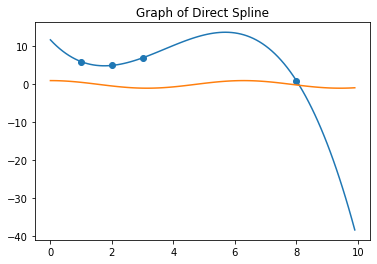

In [190]:
import matplotlib.pyplot as plt


x = np.arange( 0,10,.1)
plt.scatter(np.array(data)[:,0],np.array(data)[:,1])
plt.plot(x,directSpline(data,x))
plt.plot(x, np.cos(x))
plt.title('Graph of Direct Spline')


plt.show()

In [195]:
def divideIntervalEvenly(function,lower,upper,numberOfDivisions):
  deltax = (upper - lower)/(numberOfDivisions - 1)
  array = []
  for i in range(numberOfDivisions):
    array.append([lower + i*deltax,function(lower + i*deltax)])
  return np.array(array)

fivepoints = divideIntervalEvenly(np.cos,0,2*np.pi,5)

In [196]:
def slope(pointInitial,pointFinal):
  return (pointFinal[1]-pointInitial[1])/(pointFinal[0]-pointInitial[0])

In [197]:
def linerSpline(array,input):
  x = array[:,0]
  y = array[:,1]
  for i in range(len(x)-1):
    if (x[i]< input) & (input < x[i+1]):
      return y[i]+ slope(array[i,:],array[i+1,:])*(input - x[i])
    else:
      continue

In [198]:
linerSpline(fivepoints,1)

0.36338022763241873

In [202]:
x = np.arange(0,7,0.1)
y = [linerSpline(fivepoints,x) for x in x]

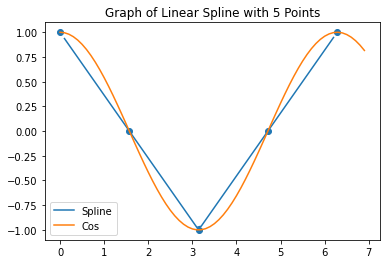

In [205]:
x = np.arange(0,7,0.1)

plt.scatter(fivepoints[:,0],fivepoints[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('Graph of Linear Spline with 5 Points')
plt.legend(['Spline','Cos'])


plt.show()

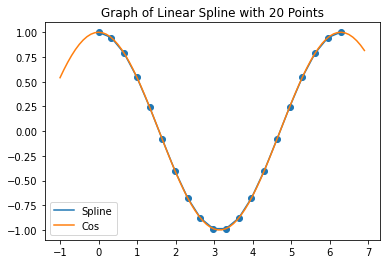

In [207]:
twentypoints = divideIntervalEvenly(np.cos,0,2*np.pi,20)
x = np.arange(-1,7,0.1)
y = [linerSpline(twentypoints,x) for x in x]
plt.scatter(twentypoints[:,0],twentypoints[:,1])
plt.plot(x,y)
plt.plot(x, np.cos(x))
plt.title('Graph of Linear Spline with 20 Points')
plt.legend(['Spline','Cos'])


plt.show()